# Principal Component Analysis (PCA)

In [1]:
from ml_code.utils import load_data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = load_data("car_data.csv")

# Print the first few rows of the dataset
data.head()

,model,horsepower,fuel_efficiency,weight,price
0,SportsCar1,450,12,3500,150000
1,SportsCar2,500,10,3800,200000
2,SportsCar3,400,14,3200,120000
3,SportsCar4,480,11,3600,180000
4,SportsCar5,420,13,3400,140000


In [2]:
# Separate the features and the target variable
X = data.drop("model", axis=1)
y = data["model"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Explained Variance Ratio:
[0.81957028 0.17267014 0.00658543 0.00117415]


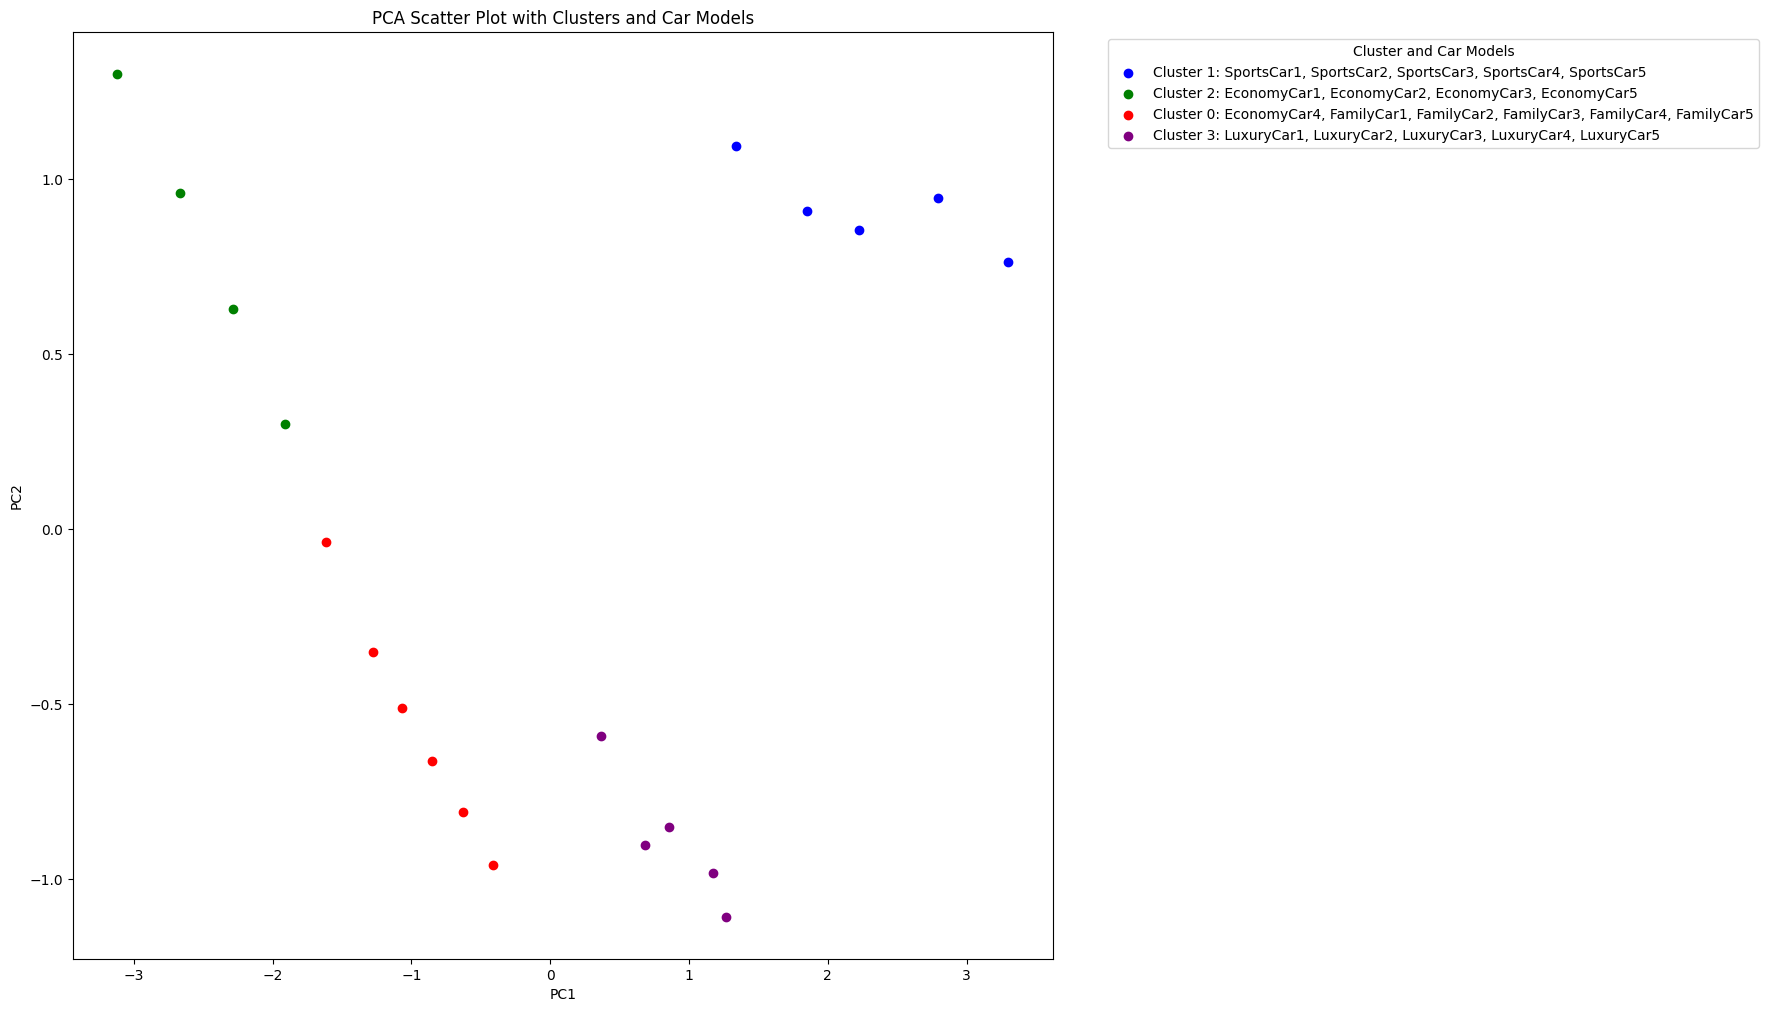

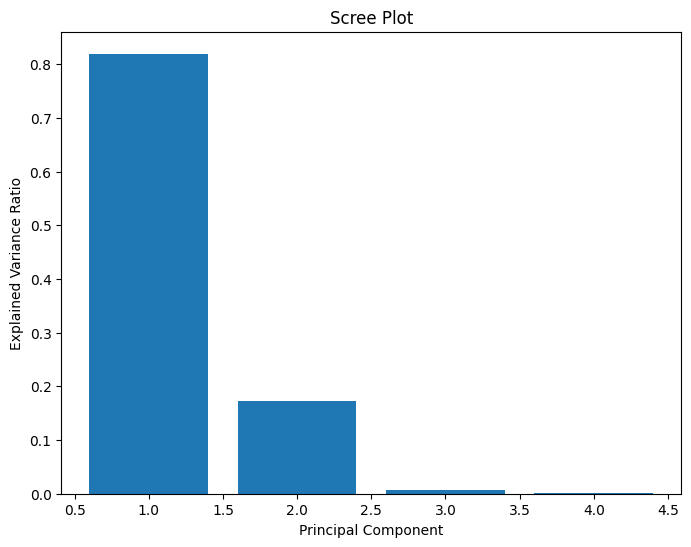

In [3]:
from sklearn.cluster import KMeans

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot the PCA scatter plot (PC1 vs PC2)
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=["PC1", "PC2"])
pca_df["Model"] = y

# Plot the PCA scatter plot with car model labels
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(X_pca)

# Plot the PCA scatter plot with car model labels and cluster rings
cluster_models = {}
for cluster in pca_df["Cluster"].unique():
    models = pca_df[pca_df["Cluster"] == cluster]["Model"].unique()
    cluster_models[cluster] = ", ".join(models)

# Plot the PCA scatter plot with car model labels and cluster rings
plt.figure(figsize=(18, 10))
colors = ["red", "blue", "green", "purple"]
for cluster in pca_df["Cluster"].unique():
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        c=colors[cluster],
        label=f"Cluster {cluster}: {cluster_models[cluster]}",
    )

    # Calculate the center of the cluster
    center = subset[["PC1", "PC2"]].mean()

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster and Car Models", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.title("PCA Scatter Plot with Clusters and Car Models")
plt.show()

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

# Analysis

The scree plot shows that the first principal component explains the majority of the variance in the data, followed by the second, third, and fourth components. The explained variance ratio for the first four components is as follows:

- First component: 0.820 (3sf)
- Second component: 0.123 (3sf)
- Third component: 0.007 (3sf)
- Fourth component: 0.001 (3sf)

The first two components explain approximately 94.3% of the variance in the data, indicating that the data can be effectively represented in a lower-dimensional space using these two components. The remaining components contribute very little to the overall variance. In fact, the third and fourth components explain less than 1% of the variance each. 